In [12]:
import pandas as pd

df_stat = pd.read_csv("../../src/data/gwangjin_stat.csv", encoding="cp949")
print(df_stat)

   도로구분       노선명                  주소                    구간  평균조도(LX)  차도등 개수  \
0    시도      천호대로      서울특별시 광진구 천호대로        천호대로 북단-군자교 동쪽        22     252   
1    시도      아차산로      서울특별시 광진구 아차산로        동일로 ~ 올림픽대교 북단        22     338   
2    시도      아차산로      서울특별시 광진구 아차산로        올림픽대교북단 ~ 구리시계        22      90   
3    시도       동일로       서울특별시 광진구 동일로        영동대교 북단 ~ 중량구계        22     178   
4    시도      답십리로      서울특별시 광진구 답십리로            동일로 ~ 용마산로        22      16   
5    시도      용마산로      서울특별시 광진구 용마산로           답십리로 ~ 천호대로        22     138   
6    시도      광나루로      서울특별시 광진구 광나루로           올림픽대로 ~ 동일로        22     237   
7    시도       능동로       서울특별시 광진구 능동로         뚝섬유원지역 ~ 용마산로        22     315   
8    시도       자양로       서울특별시 광진구 자양로      잠실대교북단 ~ 아차산역사거리        22     157   
9    시도       뚝섬로       서울특별시 광진구 뚝섬로             동일로 ~ 자양로        22     123   
10   시도       면목로       서울특별시 광진구 면목로            군자로 ~ 답십리로        20      76   
11   시도      강변역로      서울특별시

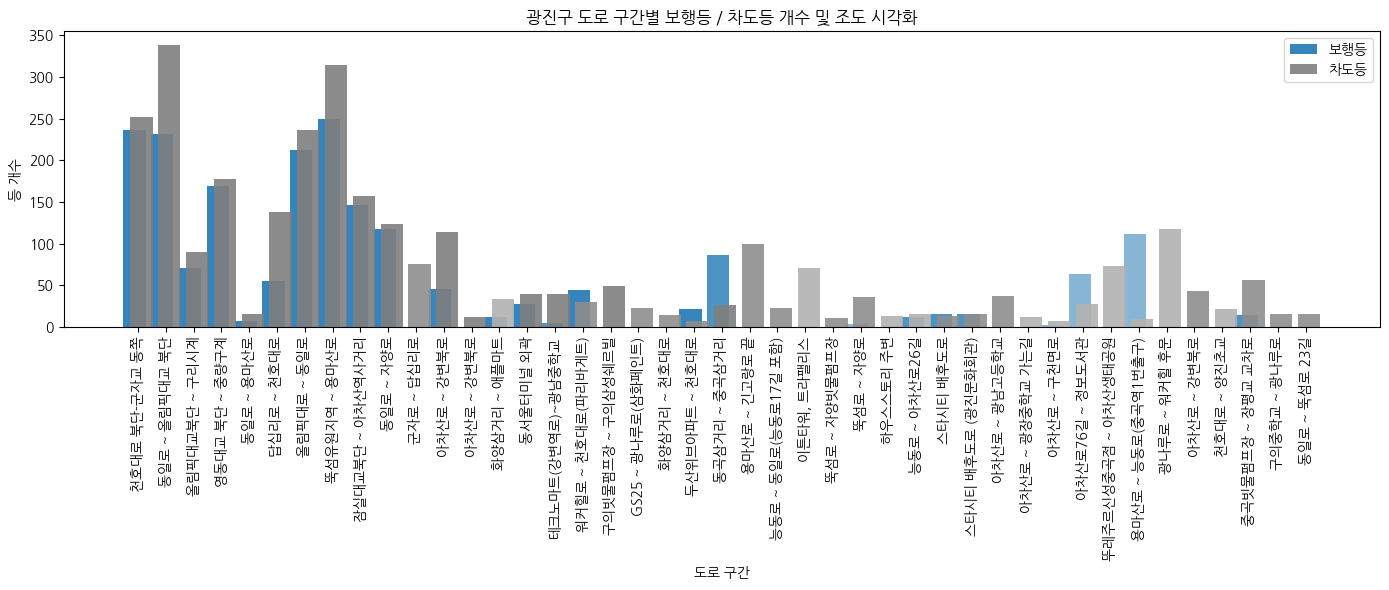

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.font_manager as fm

# 💡 색 밝기 조절 함수
def adjust_color_brightness(base_color, brightness):
    """
    base_color: '#rrggbb' 형식
    brightness: 0~1 사이 (1에 가까울수록 진함)
    """
    rgb = mcolors.hex2color(base_color)
    adjusted = tuple(min(1, c * brightness + (1 - brightness)) for c in rgb)
    return mcolors.to_hex(adjusted)

# 📄 데이터 불러오기
df = pd.read_csv("../../src/data/gwangjin_stat.csv", encoding="cp949")

# 🎨 폰트 설정 (한글 폰트 경로에 맞게 수정 필요)
font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
fontprop = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = fontprop.get_name()
plt.rcParams['axes.unicode_minus'] = False

# 📊 시각화를 위한 데이터 분리
walk_df = df[["구간", "평균조도(LX)", "보행등 개수"]].copy()
car_df = df[["구간", "평균조도(LX)", "차도등 개수"]].copy()

# 🎨 색상 설정
walk_base = "#1f77b4"  # 파란색 (보행등)
car_base = "#7f7f7f"   # 회색 (차도등)

# 조도 정규화 → 0.6~1.0 범위로 밝기 조정 (너무 연하거나 진하지 않도록)
norm = mcolors.Normalize(vmin=df["평균조도(LX)"].min(), vmax=df["평균조도(LX)"].max())
walk_colors = [adjust_color_brightness(walk_base, norm(val)*0.4 + 0.6) for val in walk_df["평균조도(LX)"]]
car_colors = [adjust_color_brightness(car_base, norm(val)*0.4 + 0.6) for val in car_df["평균조도(LX)"]]

# 📈 그래프 그리기
fig, ax = plt.subplots(figsize=(14, 6))

# 보행등 막대
ax.bar(walk_df["구간"], walk_df["보행등 개수"], color=walk_colors, label="보행등", alpha=0.9)

# 차도등 막대 (오른쪽으로 살짝 이동)
x_pos = [i + 0.25 for i in range(len(car_df["구간"]))]
ax.bar(x_pos, car_df["차도등 개수"], color=car_colors, label="차도등", alpha=0.9)

# 라벨 등 마무리
ax.set_xticks([i + 0.125 for i in range(len(df["구간"]))])
ax.set_xticklabels(df["구간"], rotation=90)
ax.set_xlabel("도로 구간")
ax.set_ylabel("등 개수")
ax.set_title("광진구 도로 구간별 보행등 / 차도등 개수 및 조도 시각화")
ax.legend()
plt.tight_layout()
plt.savefig("../../src/results/gwangjin_stat_light_level.png", dpi=150)
plt.show()

In [ ]:
#막대의 색상은 해당 구간의 평균 **조도(밝기)**를 나타냅니다:
#노란색일수록 조도가 낮고
#빨간색에 가까울수록 조도가 높습니다

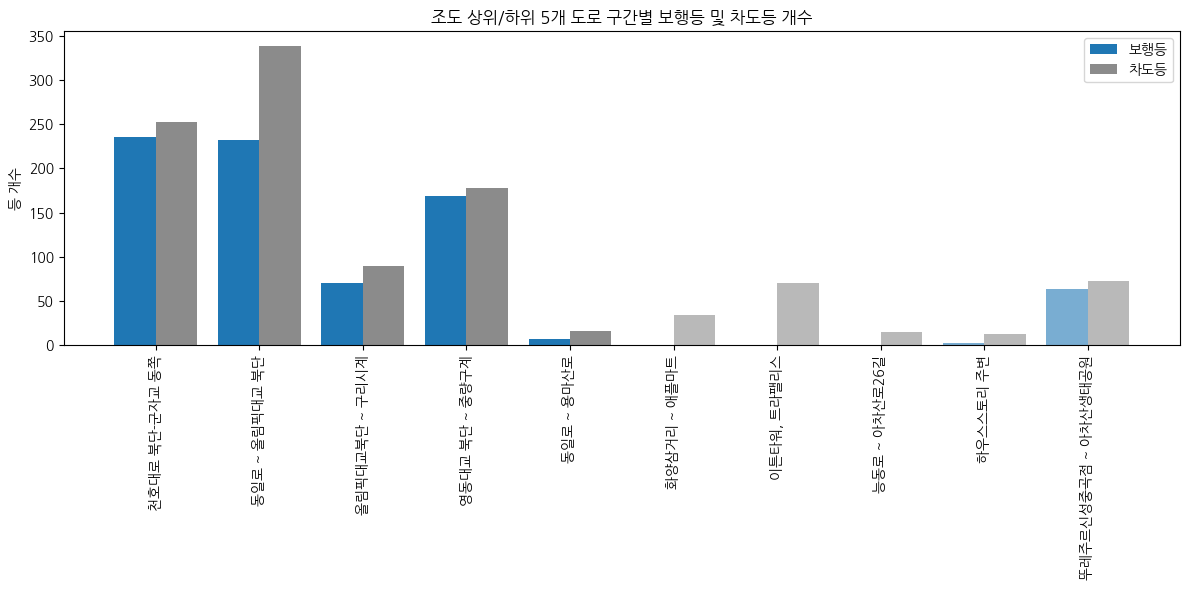

In [24]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# 평균 조도 기준 상하위 5개 구간 추출
top5 = df.sort_values(by="평균조도(LX)", ascending=False).head(5)
bottom5 = df.sort_values(by="평균조도(LX)", ascending=True).head(5)
highlight_df = pd.concat([top5, bottom5])

# 밝기 조절 함수 (기존과 동일)
def adjust_color_brightness(base_color, brightness):
    rgb = mcolors.hex2color(base_color)
    adjusted = tuple(min(1, c * brightness + (1 - brightness)) for c in rgb)
    return mcolors.to_hex(adjusted)

# 색상 설정
walk_base = "#1f77b4"  # 파란색 (보행등)
car_base = "#7f7f7f"   # 회색 (차도등)
norm = mcolors.Normalize(vmin=df["평균조도(LX)"].min(), vmax=df["평균조도(LX)"].max())

# 조도 기반으로 밝기 조절
highlight_df["walk_color"] = highlight_df["평균조도(LX)"].apply(lambda val: adjust_color_brightness(walk_base, norm(val)*0.4 + 0.6))
highlight_df["car_color"] = highlight_df["평균조도(LX)"].apply(lambda val: adjust_color_brightness(car_base, norm(val)*0.4 + 0.6))

# 그래프 그리기
fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.4
x = range(len(highlight_df))

# 보행등 / 차도등 막대
ax.bar(x, highlight_df["보행등 개수"], width=bar_width, color=highlight_df["walk_color"], label="보행등", align='center')
ax.bar([i + bar_width for i in x], highlight_df["차도등 개수"], width=bar_width, color=highlight_df["car_color"], label="차도등", alpha=0.9)

# 라벨, 제목 설정
ax.set_xticks([i + bar_width / 2 for i in x])
ax.set_xticklabels(highlight_df["구간"], rotation=90)
ax.set_ylabel("등 개수")
ax.set_title("조도 상위/하위 5개 도로 구간별 보행등 및 차도등 개수")
ax.legend()
plt.tight_layout()
plt.savefig("../../src/results/gwangjin_stat_light_level_top5.png", dpi=150)
plt.show()

In [ ]:
아차산로(올림픽대교북단 ~ 구리시계) 구간은 **높은 평균 조도(22LX)**를 유지하면서도 보행등·차도등 수가 상대적으로 적어, 효율적인 조명 배치 사례로 분석됩니다.
반면, 답십리로(동일로 ~ 용마산로) 구간은 조도(22LX)가 낮고 등 개수도 적어, 야간 보행 환경의 집중 개선이 필요한 지역으로 나타났습니다.